# Predicting Housing Prices with DecisionTree Regressor

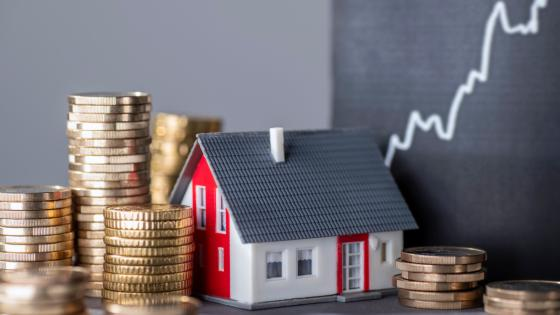

- **Dataset:** [Boston Housing](https://www.kaggle.com/datasets/jamieleech/boston-housing-dataset)

##### Boston Housing Dataset Variables

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= - if tract bounds river; 0 otherwise)
- **NOX:** Nitric oxides concentration (parts per - million)
- **RM:** Average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built prior to -
- **DIS:** Weighted distances to five Boston employment centres
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per $-
- **PTRATIO:** Pupil-teacher ratio by town
- **B:** -(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT:** % Lower status of the population
- **MEDV:** Median value of owner-occupied homes 


In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno 

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

import pickle


### 1. Data Importation:

- Import the Boston Housing dataset.
- Explore and understand the features and target variable.
___________

- Import the Boston Housing dataset.

In [2]:
#Read the csv dataset 
df = pd.read_csv("Dataset/housing.csv")

#copy
df_copy =df.copy

#Display dataset
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
#Convert dataset into dataframe 

df = pd.DataFrame(df)

In [4]:
#Separe features and target 

#Features
X = df.drop('MEDV' , axis=1) 

#Target
y = df['MEDV']

In [5]:
#Dataset describes

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#shape

df.shape

(506, 14)

In [7]:
#data type

df.dtypes.value_counts()

float64    11
int64       3
Name: count, dtype: int64

**- NO CATEGORICALS FEATUES !**

### 2. Data Preprocessing:

- Handle missing data and outliers.
- Normalize features and preprocess the dataset for regression.
_______

- Handle missing data and outliers.

In [8]:
# Missing values check 

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

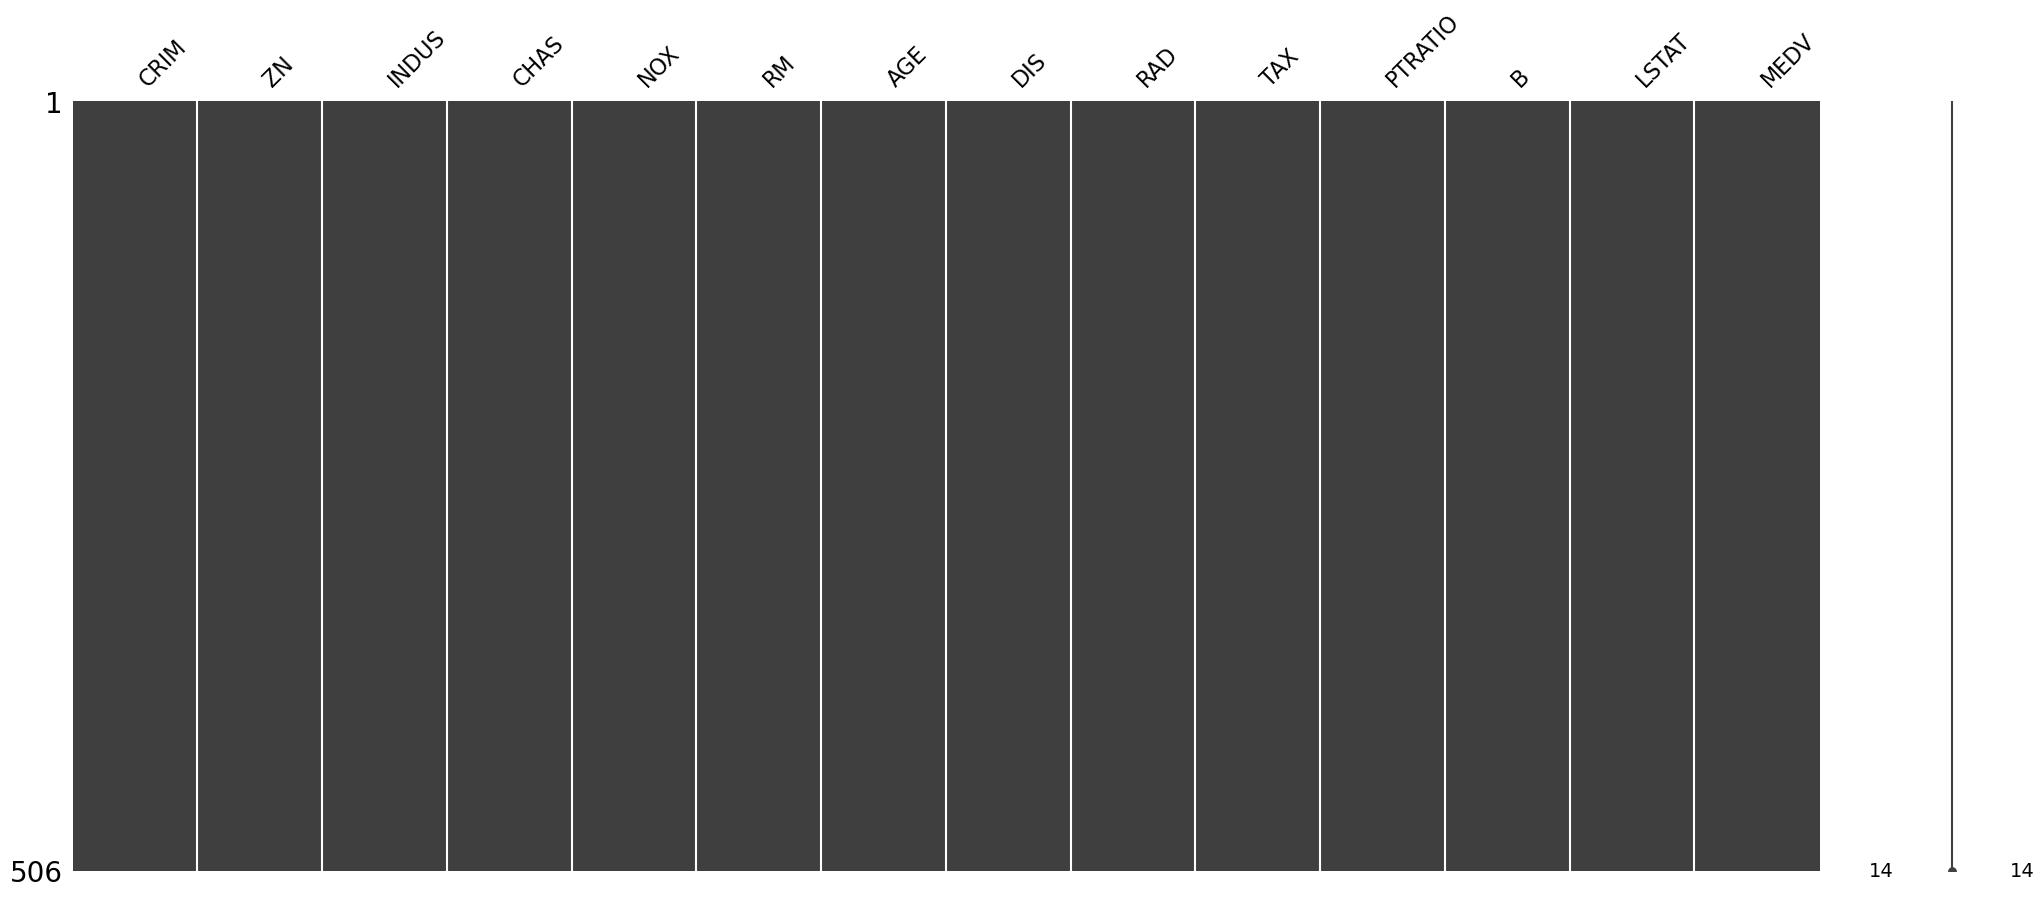

In [9]:
#Plot missing values 

msno.matrix(df)

 **NO MISSING VALUES!**

- Identify and Manage Outliers (Replacing Outliers with Means):

In [10]:
# Calculate Z-scores for all features
z_scores = zscore(df)

# Set a threshold for identifying outliers
threshold = 3

# Identify and flag outliers for each feature
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Replace outliers with the mean along each column (axis=0)
df = df.mask(outliers, df.mean(axis=0), axis=1)

# Display the DataFrame with outliers replaced by the mean
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- Normalize features and preprocess the dataset for regression.

In [11]:
# Standardize features and create a DataFrame with standardized features
scaler = StandardScaler()
X_Standardized_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Concatenate the original DataFrame with the standardized DataFrame
X_Standardized_df = pd.concat([X, X_Standardized_df], axis=1)


In [12]:
X_Standardized_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,...,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,...,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,...,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,...,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [13]:
#Display Standardized features 

print("Standardized features:\n")

X_Standardized_df

Standardized features:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,...,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,...,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,...,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,...,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [14]:
#Split dataset into training and test sets

X_train , X_test , y_train , y_test = train_test_split(X_Standardized_df,y , test_size=0.2 , random_state=42)

In [15]:
# Save the split and Standardised datasets

with open('Dataset/Splits/X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

with open('Dataset/Splits/X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('Dataset/Splits/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

with open('Dataset/Splits/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

with open('Dataset/preprocessed/X_Standardized.pkl', 'wb') as f:
    pickle.dump(X_Standardized_df, f)

### 3. Algorithm: DecisionTreeRegressor for Regression

- Implement **DecisionTreeRegressor** for regression using Python and scikit-learn.
- Train the model on the preprocessed Boston Housing dataset.

____

In [16]:
#Model svm

model = DecisionTreeRegressor(random_state=42)

#Train the model 

model.fit(X_train , y_train)


#Predict 
y_pred = model.predict(X_test)

In [17]:
y_pred

array([28.1, 32. , 15.2, 21.7, 23.2, 18.5, 16.6, 16.7, 22.7, 22. , 19.5,
       19.5,  8.4, 21.5, 18.9, 25. , 20.5, 10.5, 46. , 13. , 23. , 24.4,
       13.6, 22.8, 13.8, 14.9, 21. , 14.6, 19.4, 20.8, 18.3, 23.1, 10.4,
       16.2, 13.3, 15.6, 33.4, 18.5, 20.4, 24.8, 19.8, 30.1, 44. , 18.2,
       22. , 13. , 14.3, 24.1, 17.5, 32. , 20.1, 34.9, 16.6, 32. , 43.1,
       19.5, 15.2, 27.9, 21.6, 22.5, 24.8, 33. , 29.8, 19.3, 28. , 13.4,
       13. , 22.9, 27.9, 14.1, 24.5, 28.7,  8.3, 18.6, 21.5, 10.5, 19.3,
       50. , 13.3,  8.1, 21. , 16.3, 19.4, 10.5, 14.5, 28.4, 14.3, 23.1,
       22.9, 18.1, 22.8,  8.8, 19.2, 17.5, 16.2, 19.2, 50. , 16.3, 11.7,
       16.3, 19. , 28.1])

In [18]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)

mse_svm = mean_squared_error(y_test, y_pred)

print("Model Mean Squared Error:", mse_svm)
print("R-squared (R2):", r2)

Model Mean Squared Error: 9.440784313725489
R-squared (R2): 0.8712628217599798


### 4. Model Optimization:

- Fine-tune hyperparameters and optimize the **DecisionTreeRegressor** model.
- Implement cross-validation for robust performance evaluation.
______

- Fine-tune hyperparameters and optimize the **DecisionTreeRegressor** model.

In [19]:
# Hyperparameter grid
param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Scoring metric: Negative mean squared error
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)
grid_search.fit(X, y)

# Best hyperparameters and model
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

# Cross-validated mean squared error
cv_scores = cross_val_score(best_dt_model, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=scorer)
average_cv_score = -cv_scores.mean()

# Print results
print("Best Hyperparameters:", best_params)
print("CV Mean Squared Error:", average_cv_score)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
CV Mean Squared Error: 19.448195656933308


In [20]:
# Create tuned Decision Tree model
model_tuned = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=42)

# Train
model_tuned.fit(X_train, y_train)

# Predict
predictions_tuned = model_tuned.predict(X_test)

In [21]:
# Evaluate the tuned model
r2_tuned = r2_score(y_test, predictions_tuned)

mse_svm_tuned = mean_squared_error(y_test, predictions_tuned)

print("Tuned Model Mean Squared Error:", mse_svm_tuned)
print("Tuned R-squared (R2):", r2_tuned)

Tuned Model Mean Squared Error: 8.14666892124815
Tuned R-squared (R2): 0.8889097415929322


In [22]:
print("R2_tuned is",round((r2_tuned-r2)*100,2),"% better than R2")

R2_tuned is 1.76 % better than R2


- Plot the overfitting curve

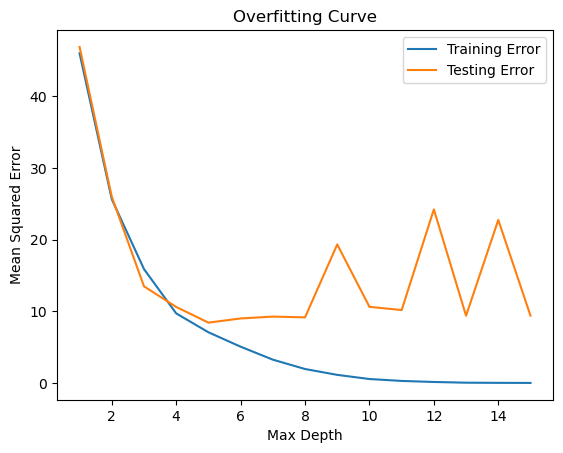

In [23]:
# Plot the overfitting curve
max_depth_values = range(1, 16)
train_errors = []
test_errors = []

for max_depth in max_depth_values:
    dt_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt_regressor.fit(X_train, y_train)
    y_train_pred = dt_regressor.predict(X_train)
    y_test_pred = dt_regressor.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.plot(max_depth_values, train_errors, label='Training Error')
plt.plot(max_depth_values, test_errors, label='Testing Error')
plt.title('Overfitting Curve')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

-  Plot the decision tree

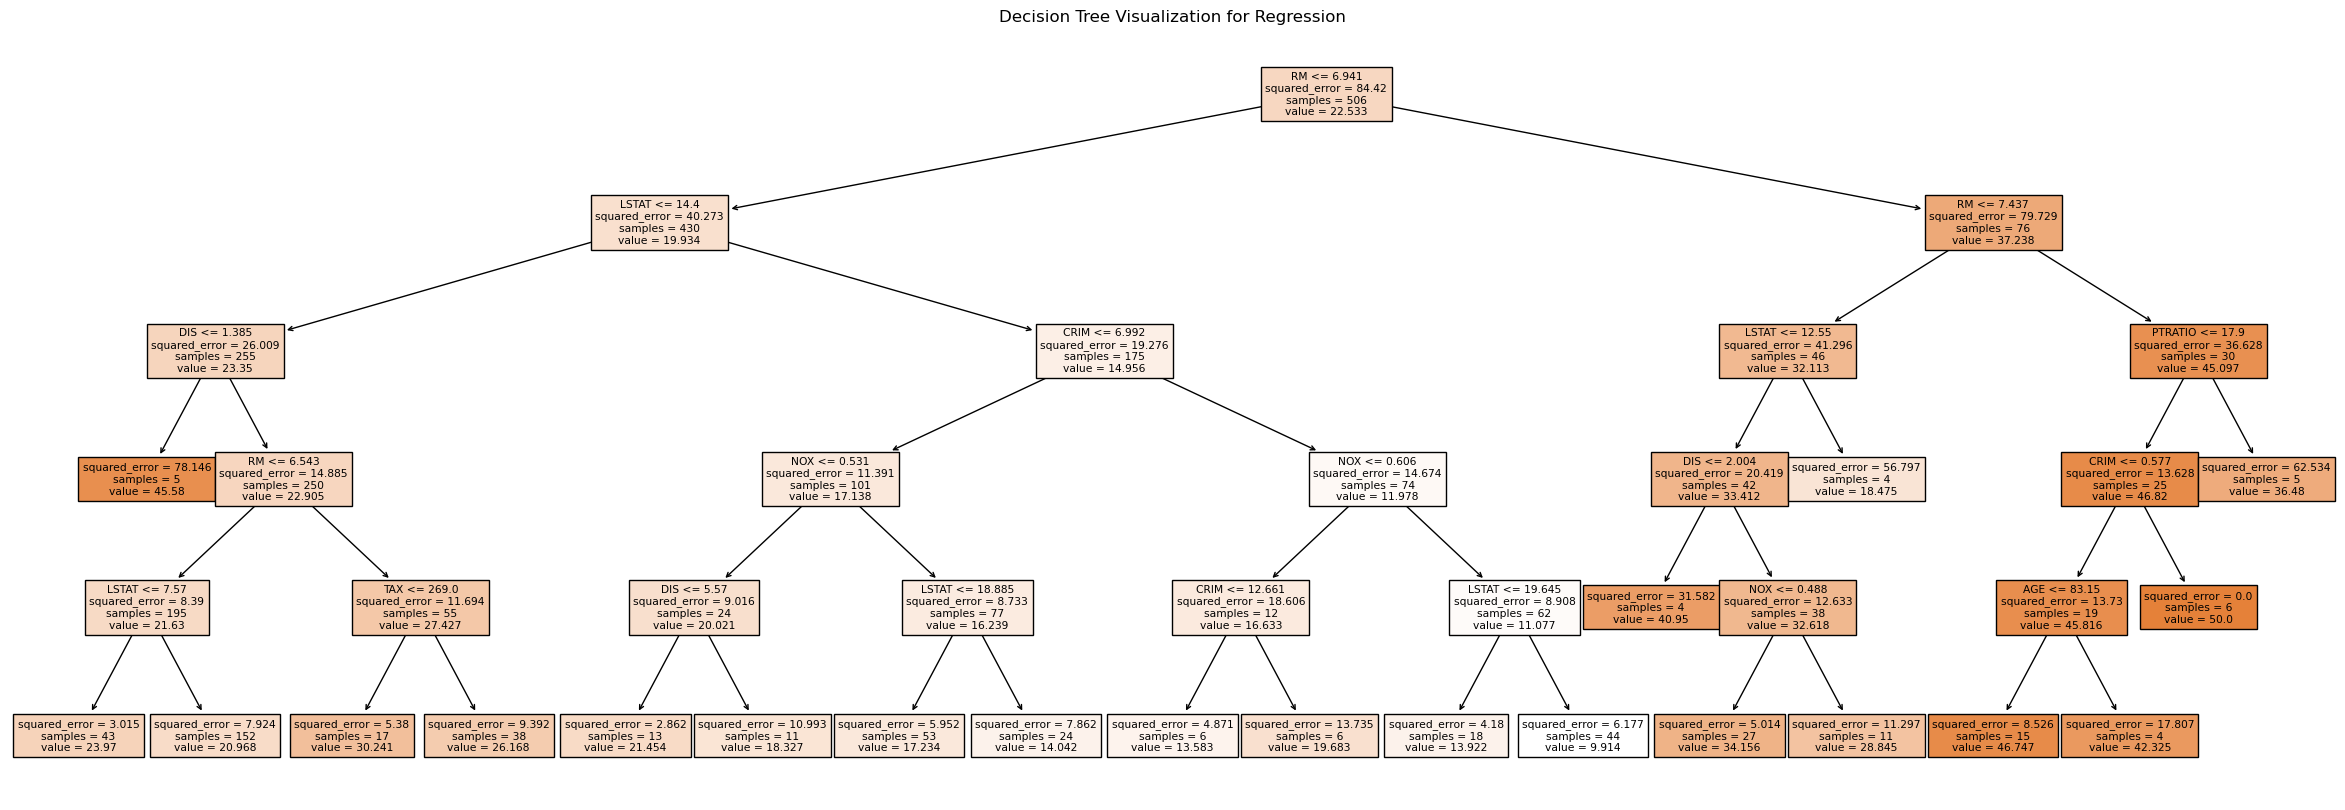

In [24]:

# Plot the decision tree
plt.figure(figsize=(30, 10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns)
plt.title('Decision Tree Visualization for Regression')
plt.show()

- Scatter plot for training and test sets 

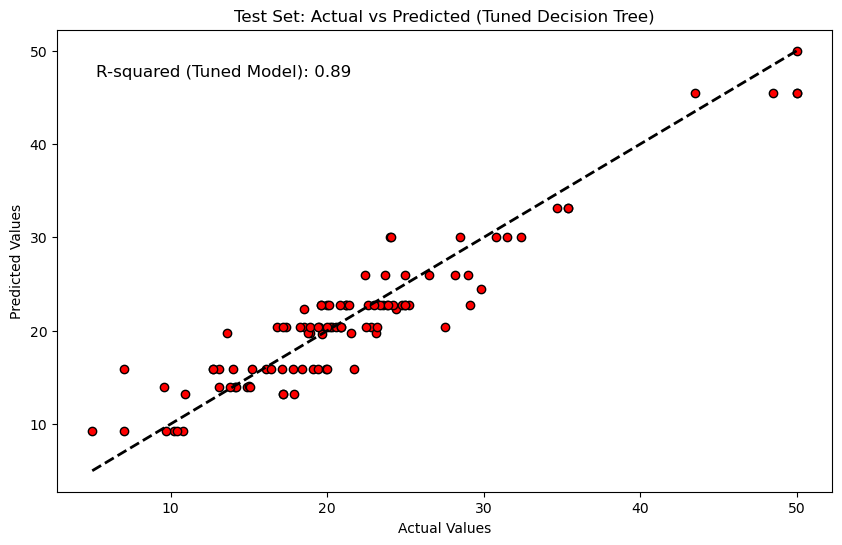

In [25]:
# Set a larger figure size 
plt.figure(figsize=(10, 6))

# Scatter plot for test set
plt.scatter(y_test, predictions_tuned, c='red', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
plt.title('Test Set: Actual vs Predicted (Tuned Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Calculate R-squared for test set
r2_test_tuned = r2_score(y_test, predictions_tuned)

# Add R-squared annotation
plt.text(0.05, 0.9, f'R-squared (Tuned Model): {r2_test_tuned:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()


### 5. Model Interpretation:

- Interpret regression results and performance metrics.
- Analyze feature importance and their impact on house price predictions.
____

    Feature    Importance
18       RM  6.369187e-01
25    LSTAT  1.975733e-01
7       DIS  6.773019e-02
13     CRIM  5.357527e-02
23  PTRATIO  1.378283e-02
19      AGE  9.147994e-03
5        RM  6.873793e-03
10  PTRATIO  4.465895e-03
4       NOX  3.621698e-03
0      CRIM  3.583588e-03
24        B  2.174765e-03
11        B  5.519741e-04
6       AGE  2.582395e-16
9       TAX  0.000000e+00
12    LSTAT  0.000000e+00
1        ZN  0.000000e+00
14       ZN  0.000000e+00
8       RAD  0.000000e+00
16     CHAS  0.000000e+00
17      NOX  0.000000e+00
2     INDUS  0.000000e+00
3      CHAS  0.000000e+00
20      DIS  0.000000e+00
21      RAD  0.000000e+00
22      TAX  0.000000e+00
15    INDUS  0.000000e+00


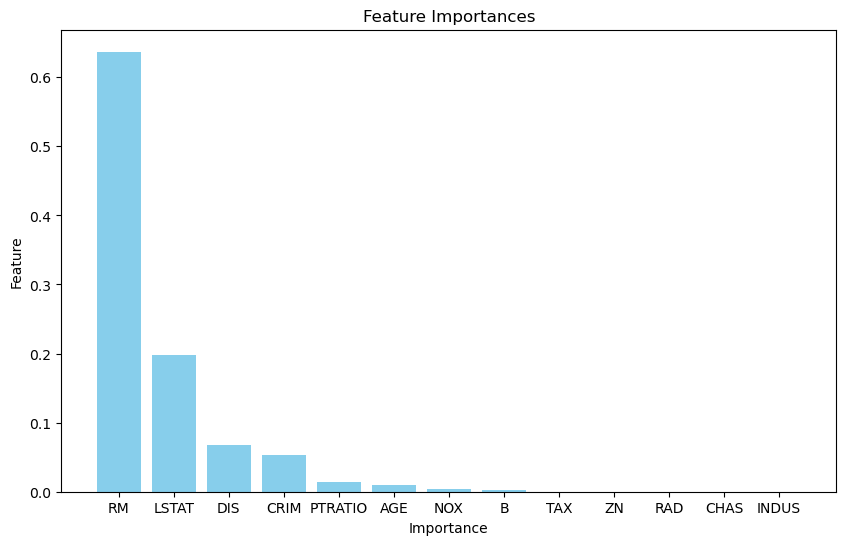

In [26]:
# feature importances 
feature_importances = model_tuned.feature_importances_

#column names
X_train_col = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_train_col, 'Importance': feature_importances})

# Sort features based on their importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)


# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

- Save the best model

In [27]:
with open('Models/model_tuned.pkl', 'wb') as f:
    pickle.dump(model_tuned, f)